<a href="https://colab.research.google.com/github/Misudhari/Deep-Learning-Lab/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [59]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Salary_Data.csv")
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


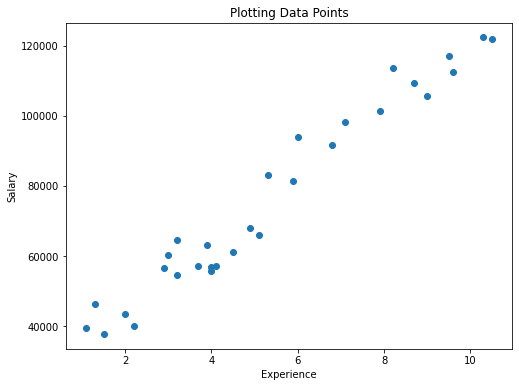

In [60]:
x = data.YearsExperience
y = data.Salary

# print(x)
# print()
# print(y)

plt.figure(figsize=(8,6))
plt.title('Plotting Data Points')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
print(f"x_train:\n{x_train}")
print('\n')
print(f"x_test:\n{x_test}")
print('\n')
print(f"y_train:\n{y_train}")
print('\n')
print(f"y_test:\n{y_test}")
print('\n')

# print(x_train.iloc[0])
# print(y_train.iloc[0])

x_train:
4      2.2
15     4.9
26     9.5
14     4.5
1      1.3
7      3.2
5      2.9
11     4.0
16     5.1
21     7.1
24     8.7
20     6.8
9      3.7
29    10.5
3      2.0
23     8.2
12     4.0
27     9.6
8      3.2
25     9.0
Name: YearsExperience, dtype: float64


x_test:
10     3.9
28    10.3
17     5.3
22     7.9
6      3.0
0      1.1
2      1.5
18     5.9
19     6.0
13     4.1
Name: YearsExperience, dtype: float64


y_train:
4      39891.0
15     67938.0
26    116969.0
14     61111.0
1      46205.0
7      54445.0
5      56642.0
11     55794.0
16     66029.0
21     98273.0
24    109431.0
20     91738.0
9      57189.0
29    121872.0
3      43525.0
23    113812.0
12     56957.0
27    112635.0
8      64445.0
25    105582.0
Name: Salary, dtype: float64


y_test:
10     63218.0
28    122391.0
17     83088.0
22    101302.0
6      60150.0
0      39343.0
2      37731.0
18     81363.0
19     93940.0
13     57081.0
Name: Salary, dtype: float64




Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
m: 12407.069742663974, c: 4452.604748339


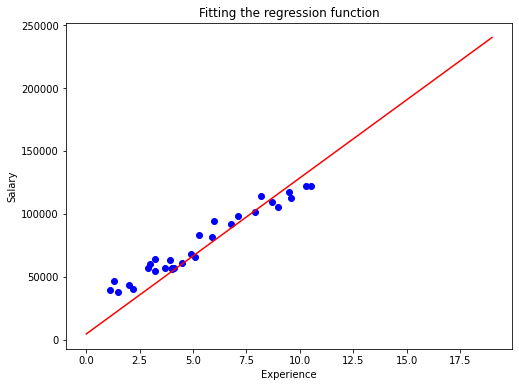


x_test: 3.9	 Y_pred: 52840.1767447285

x_test: 10.3	 Y_pred: 132245.42309777797

x_test: 5.3	 Y_pred: 70210.07438445806

x_test: 7.9	 Y_pred: 102468.4557153844

x_test: 3.0	 Y_pred: 41673.81397633092

x_test: 1.1	 Y_pred: 18100.381465269373

x_test: 1.5	 Y_pred: 23063.20936233496

x_test: 5.9	 Y_pred: 77654.31623005646

x_test: 6.0	 Y_pred: 78895.02320432285

x_test: 4.1	 Y_pred: 55321.59069326129


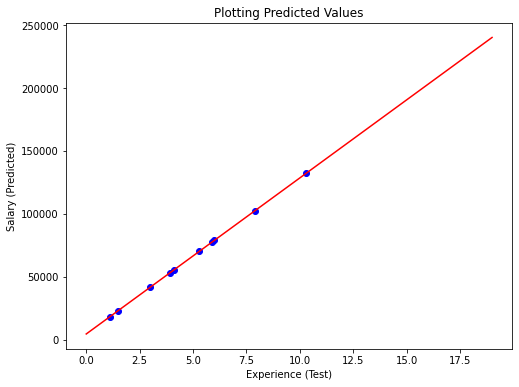

In [62]:
# def loss_function(m, c, points):
#   total_error = 0
#   for i in range(len(points)):
#     Xi = points.iloc[i].YearsExperience
#     Yi = points.iloc[i].Salary
#     total_error += (Yi - (m * Xi + c)) ** 2
#   total_error / float(len(points))

def gradient_descent(x_train, y_train, m_now, c_now, lrate):
  m_gradient = 0
  c_gradient = 0

  n = len(x_train)

  for i in range(n):

    m_gradient += -(2/n) * x_train.iloc[i] * (y_train.iloc[i] - (m_now * x_train.iloc[i] + c_now))
    c_gradient += -(2/n) * (y_train.iloc[i] - (m_now * x_train.iloc[i] + c_now))

  m = m_now - m_gradient * lrate
  c = c_now - c_gradient * lrate

  return m, c

m = 0
c = 0
lrate = 0.001
epochs = 300

for i in range(epochs):
  if i % 50 == 0:
    print(f"Epoch: {i}")
  m, c = gradient_descent(x_train, y_train, m, c, lrate)

print(f"m: {m}, c: {c}")


plt.figure(figsize=(8,6))
plt.scatter(data.YearsExperience, data.Salary, color='blue')
plt.plot(list(range(0,20)), [m * x + c for x in range(0,20)], color = 'red')
plt.title('Fitting the regression function')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

y_pred_list = []
for i in range (len(x_test)):
  y_pred = m * x_test.iloc[i] + c
  y_pred_list.append(y_pred)
  print(f"\nx_test: {x_test.iloc[i]}\t Y_pred: {y_pred}" )


plt.figure(figsize=(8,6))
plt.scatter(x_test, y_pred_list, color='blue')
plt.plot(list(range(0,20)), [m * x + c for x in range(0,20)], color = 'red')
plt.title('Plotting Predicted Values')
plt.xlabel('Experience (Test)')
plt.ylabel('Salary (Predicted)')
plt.show()